In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.stlouisfed as fred
from src import utils, plotting, indicators

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
# data_name = "GDP"
# data1 = fred.get_series_observation(data_name)
# data1.rename(columns={'lin': 'Close'}, inplace=True)
# data1.index = data1.index.tz_localize('UTC').tz_convert('America/New_York')
# data1 = data1[data1.index > '2012-01-01']

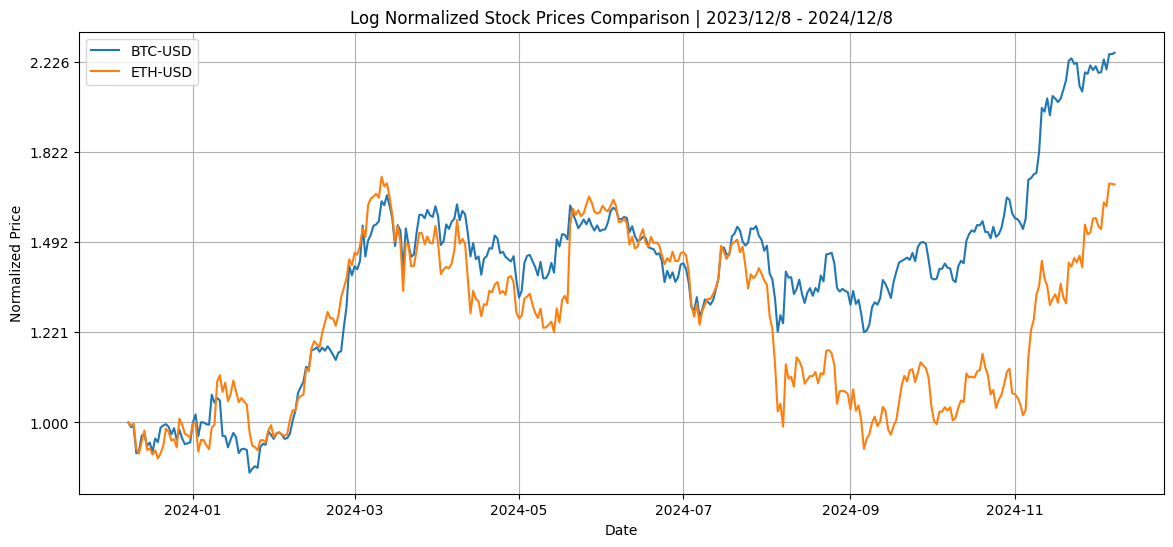

BTC-USD / ETH-USD correlation:0.66103019


In [11]:
assets = plotting.compare_assets(
    [
        "BTC-USD",
        "ETH-USD",
    ],
    start_date=[2023, 12, 8],
    end_date=[2024, 12, 8],
    log_scale=True,
)

,A,B
Date,,
2016-12-07 00:00:00-05:00,770.81,NaN
2016-12-08 00:00:00-05:00,772.79,NaN
2016-12-09 00:00:00-05:00,774.65,NaN
2016-12-10 00:00:00-05:00,769.73,NaN
2016-12-11 00:00:00-05:00,780.09,NaN
...,...,...
2024-12-03 00:00:00-05:00,"98,768.53","3,841.33"
2024-12-04 00:00:00-05:00,"96,593.57","3,811.01"
2024-12-05 00:00:00-05:00,"99,920.71","4,005.81"


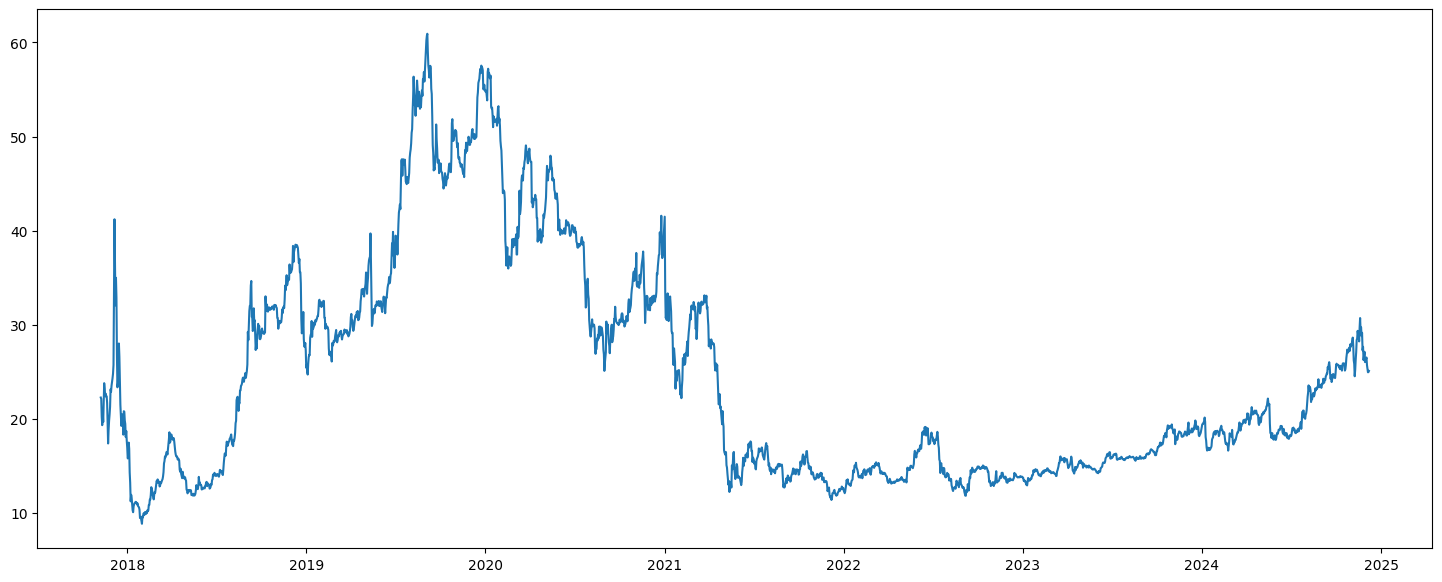

In [4]:
df = pd.DataFrame({"A": assets[0][1]["Close"], "B": assets[1][1]["Close"]})
plt.figure(figsize=(18, 7))
plt.plot(df.index, df["A"] / df["B"])
df

In [5]:
btc = assets[0][1]
mstr = assets[1][1]
z_score_val = indicators.z_score(btc, mstr)
data = pd.DataFrame()
data["BTC"] = btc["Close"]
data["MSTR"] = mstr["Close"]
data["Z_Score"] = z_score_val
data.dropna(inplace=True)
data

,BTC,MSTR,Z_Score
Date,,,
2017-12-02 00:00:00-05:00,"11,323.20",465.85,1.90
2017-12-03 00:00:00-05:00,"11,657.20",470.20,1.87
2017-12-04 00:00:00-05:00,"11,916.70",463.28,1.82
2017-12-05 00:00:00-05:00,"14,291.50",428.59,2.67
2017-12-06 00:00:00-05:00,"17,899.70",434.41,3.30
...,...,...,...
2024-12-03 00:00:00-05:00,"98,768.53","3,841.33",1.11
2024-12-04 00:00:00-05:00,"96,593.57","3,811.01",0.60
2024-12-05 00:00:00-05:00,"99,920.71","4,005.81",1.38


In [6]:
from backtesting import Backtest
from src.strategies import PairsTradingZScore

print(data)

strategy = PairsTradingZScore
strategy.low_threshold = -2
strategy.high_threshold = 2
bt_pair_a = Backtest(data, strategy, cash=5_000, commission=0.004, trade_on_close=True)
stats = bt_pair_a.run()
stats

Loading BokehJS ...

ImportError: cannot import name 'PairsTradingZScore' from 'src.strategies' (/Users/ivankyulev/Projects/Notebooks/src/strategies/__init__.py)